In [7]:
# !wget -r -A.html -P rtdocs https://python.langchain.com/en/latest/

--2023-06-09 12:21:39--  https://python.langchain.com/en/latest/
Resolving python.langchain.com (python.langchain.com)... 104.17.32.82, 104.17.33.82
Connecting to python.langchain.com (python.langchain.com)|104.17.32.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: 'rtdocs/python.langchain.com/en/latest/index.html'

     0K .......... .......... .......... .......... .......... 3.99M
    50K .......... .......... .......... .......... .......... 4.82M
   100K .........                                              10.4M=0.02s

2023-06-09 12:21:39 (4.61 MB/s) - 'rtdocs/python.langchain.com/en/latest/index.html' saved [112583]

Loading robots.txt; please ignore errors.
--2023-06-09 12:21:39--  https://python.langchain.com/robots.txt
Reusing existing connection to python.langchain.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: 'rtdocs/python.langchain.com/robots.txt.tmp'

   

In [75]:
from langchain.document_loaders.base import BaseLoader
from langchain.schema import Document
from typing import Optional, Any, List
from pathlib import Path

class MyReadTheDocsLoader(BaseLoader):
    """Loader that loads ReadTheDocs documentation directory dump."""

    def __init__(
        self,
        path: str,
        encoding: Optional[str] = None,
        errors: Optional[str] = None,
        **kwargs: Optional[Any]
    ):
        """Initialize path."""
        try:
            from bs4 import BeautifulSoup

        except ImportError:
            raise ValueError(
                "Could not import python packages. "
                "Please install it with `pip install beautifulsoup4`. "
            )

        try:
            _ = BeautifulSoup(
                "<html><body>Parser builder library test.</body></html>", **kwargs
            )
        except Exception as e:
            raise ValueError("Parsing kwargs do not appear valid") from e

        self.file_path = path
        self.encoding = encoding
        self.errors = errors
        self.bs_kwargs = kwargs

    def load(self) -> List[Document]:
        """Load documents."""
        from bs4 import BeautifulSoup

        def _clean_data(data: str) -> str:
            soup = BeautifulSoup(data, **self.bs_kwargs)
            
            # Use the CSS selector to find the 'article' tag
            article_contents = soup.select('#main-content > div.bd-content > div.bd-article-container > article')
            if not article_contents:
                return ''
            
            article_content = article_contents[0]
            # text_contents = [string for string in article_content.stripped_strings]
            text_contents = [string for string in article_content.strings]
            return '\n'.join(text_contents)

        docs = []
        debug_i = 0
        for p in tqdm(Path(self.file_path).rglob("*")):
            debug_i += 1
            if debug_i > 30:
                break
            if p.is_dir():
                continue
            with open(p, encoding=self.encoding, errors=self.errors) as f:
                text = _clean_data(f.read())
                    
            metadata = {"source": str(p)}
            docs.append(Document(page_content=text, metadata=metadata))
        return docs
#             text = soup.find_all("main", {"id": "main-content"})

#             if len(text) == 0:
#                 text = soup.find_all("div", {"role": "main"})

#             if len(text) != 0:
#                 text = text[0].get_text()
#             else:
#                 text = ""
#             return "\n".join([t for t in text.split("\n") if t])

#         docs = []
#         for p in Path(self.file_path).rglob("*"):
#             if p.is_dir():
#                 continue
#             with open(p, encoding=self.encoding, errors=self.errors) as f:
#                 text = _clean_data(f.read())
#             metadata = {"source": str(p)}
#             docs.append(Document(page_content=text, metadata=metadata))
#         return docs


loader = MyReadTheDocsLoader('rtdocs', encoding='utf-8', features='lxml')
docs = loader.load()
len(docs)

0it [00:00, ?it/s]

18

In [76]:
# from langchain.document_loaders import ReadTheDocsLoader

# loader = ReadTheDocsLoader('rtdocs', encoding='utf-8', features='lxml')
# docs = loader.load()
# len(docs)

In [77]:
for doc in docs[5:10]:
    print(doc.metadata['source'].replace('rtdocs\\', 'https://').replace('\\', '/'))
    print(doc.page_content[:1000])
    print('\n\n')

https://python.langchain.com/en/latest/search.html




https://python.langchain.com/en/latest/additional_resources/deploy_llms.html




Deploying LLMs in Production
#


In today’s fast-paced technological landscape, the use of Large Language Models (LLMs) is rapidly expanding. As a result, it’s crucial for developers to understand how to effectively deploy these models in production environments. LLM interfaces typically fall into two categories:






Case 1: Utilizing External LLM Providers (OpenAI, Anthropic, etc.)
In this scenario, most of the computational burden is handled by the LLM providers, while LangChain simplifies the implementation of business logic around these services. This approach includes features such as prompt templating, chat message generation, caching, vector embedding database creation, preprocessing, etc.










Case 2: Self-hosted Open-Source Models
Alternatively, developers can opt to use smaller, yet comparably capable, self-hosted open-source LLM model

In [28]:
print(docs[8].page_content)

.md
.pdf
document.write(`
  <button class="theme-switch-button btn btn-sm btn-outline-primary navbar-btn rounded-circle" title="light/dark" aria-label="light/dark" data-bs-placement="bottom" data-bs-toggle="tooltip">
    <span class="theme-switch" data-mode="light"><i class="fa-solid fa-sun"></i></span>
    <span class="theme-switch" data-mode="dark"><i class="fa-solid fa-moon"></i></span>
    <span class="theme-switch" data-mode="auto"><i class="fa-solid fa-circle-half-stroke"></i></span>
  </button>
`);
document.write(`
  <button class="btn btn-sm navbar-btn search-button search-button__button" title="Search" aria-label="Search" data-bs-placement="bottom" data-bs-toggle="tooltip">
    <i class="fa-solid fa-magnifying-glass"></i>
  </button>
`);
Tracing
 Contents 
Tracing Walkthrough
Changing Sessions
Tracing#
By enabling tracing in your LangChain runs, you’ll be able to more effectively visualize, step through, and debug your chains and agents.
First, you should install tracing and s

In [25]:
print(docs[8].metadata)

{'source': 'rtdocs\\python.langchain.com\\en\\latest\\additional_resources\\tracing.html'}


In [29]:
import tiktoken

tokenizer = tiktoken.get_encoding('cl100k_base')

# create the length function
def tiktoken_len(text):
    tokens = tokenizer.encode(
        text,
        disallowed_special=()
    )
    return len(tokens)

In [30]:
tiktoken.encoding_for_model('gpt-3.5-turbo')

<Encoding 'cl100k_base'>

In [31]:
token_counts = [tiktoken_len(doc.page_content) for doc in docs]

In [32]:
print(f"""Min: {min(token_counts)}
Avg: {int(sum(token_counts) / len(token_counts))}
Max: {max(token_counts)}""")

Min: 256
Avg: 1545
Max: 62086


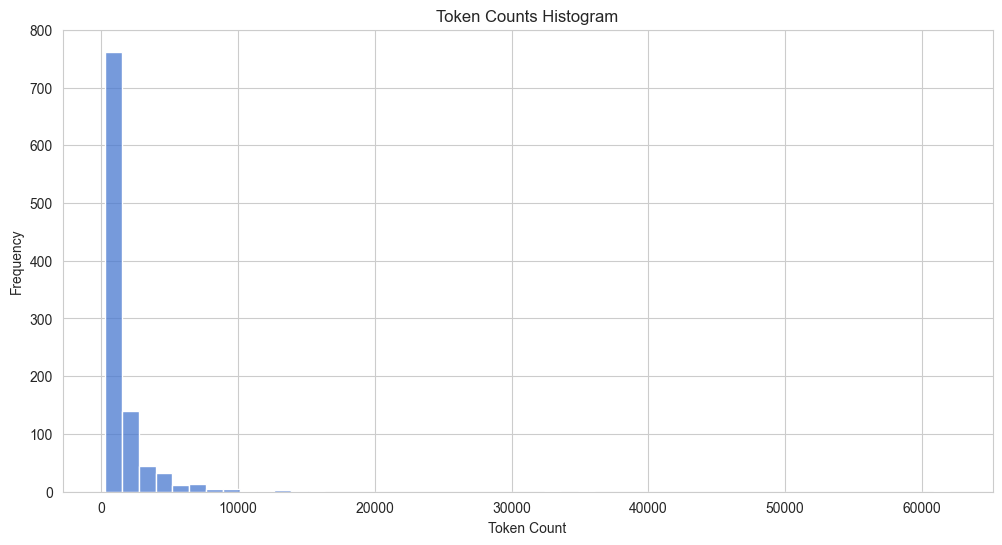

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# set style and color palette for the plot
sns.set_style("whitegrid")
sns.set_palette("muted")

# create histogram
plt.figure(figsize=(12, 6))
sns.histplot(token_counts, kde=False, bins=50)

# customize the plot info
plt.title("Token Counts Histogram")
plt.xlabel("Token Count")
plt.ylabel("Frequency")

plt.show()

In [36]:
token_counts.index(62086)

573

In [39]:
# print(docs[573].page_content)
print(docs[573].metadata)

{'source': 'rtdocs\\python.langchain.com\\en\\latest\\reference\\modules\\llms.html'}


That is a useful page, so we'll leave that in there

In [40]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=400,
    chunk_overlap=20,  # number of tokens overlap between chunks
    length_function=tiktoken_len,
    separators=['\n\n', '\n', ' ', '']
)

In [42]:

chunks = text_splitter.split_text(docs[8].page_content)
len(chunks)

3

In [43]:
tiktoken_len(chunks[0]), tiktoken_len(chunks[1])

(353, 378)

In [45]:
import hashlib
m = hashlib.md5()  # this will convert URL into unique ID

url = docs[8].metadata['source'].replace('rtdocs/', 'https://')
print(url)

# convert URL to unique ID
m.update(url.encode('utf-8'))
uid = m.hexdigest()[:12]
print(uid)

rtdocs\python.langchain.com\en\latest\additional_resources\tracing.html
cb638c1eb5e5


In [46]:
from tqdm.auto import tqdm

documents = []

for doc in tqdm(docs):
    url = doc.metadata['source'].replace('rtdocs/', 'https://')
    m.update(url.encode('utf-8'))
    uid = m.hexdigest()[:12]
    chunks = text_splitter.split_text(doc.page_content)
    for i, chunk in enumerate(chunks):
        documents.append({
            'id': f'{uid}-{i}',
            'text': chunk,
            'source': url
        })

len(documents)

  0%|          | 0/1023 [00:00<?, ?it/s]

5175

In [47]:
import json

with open('train.jsonl', 'w') as f:
    for doc in documents:
        f.write(json.dumps(doc) + '\n')

In [48]:
documents = []

with open('train.jsonl', 'r') as f:
    for line in f:
        documents.append(json.loads(line))

len(documents)

5175

In [49]:
documents[0]

{'id': 'ab037d116dcd-0',
 'text': '.md\n.pdf\ndocument.write(`\n  <button class="theme-switch-button btn btn-sm btn-outline-primary navbar-btn rounded-circle" title="light/dark" aria-label="light/dark" data-bs-placement="bottom" data-bs-toggle="tooltip">\n    <span class="theme-switch" data-mode="light"><i class="fa-solid fa-sun"></i></span>\n    <span class="theme-switch" data-mode="dark"><i class="fa-solid fa-moon"></i></span>\n    <span class="theme-switch" data-mode="auto"><i class="fa-solid fa-circle-half-stroke"></i></span>\n  </button>\n`);\ndocument.write(`\n  <button class="btn btn-sm navbar-btn search-button search-button__button" title="Search" aria-label="Search" data-bs-placement="bottom" data-bs-toggle="tooltip">\n    <i class="fa-solid fa-magnifying-glass"></i>\n  </button>\n`);\nDependents\nDependents#\nDependents stats for hwchase17/langchain\n[update: 2023-06-05; only dependent repositories with Stars > 100]\nRepository\nStars\nopenai/openai-cookbook\n38024\nLAION-AI/